In [1]:
!pip install kmodes

In [2]:
from kmodes.kmodes import KModes

In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_excel("DATA3.xlsx")

In [5]:
data.head()

,Name,Q1,Q2,Q3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,...,Q14_10,Q15_10,Q16_10,S1,S2,S3,S4,S5,S6,S7
0,Shonuben nileshbhai bariya,45,4,Job Housewife Independent Profession,0,1,0,0,1,0,...,2,NaN,3,43.333333,50.000000,48.888889,24.444444,36.666667,54.444444,24.444444
1,Tinaben bariya,65,1,Job,0,0,0,0,1,0,...,4,NaN,3,47.777778,53.333333,54.444444,35.555556,30.000000,65.555556,28.888889
2,Sonal bariya,35,5,Housewife small businessJob,0,0,0,0,1,1,...,4,NaN,3,65.555556,60.000000,65.555556,47.777778,47.777778,76.666667,34.444444
3,Gita,83,0,small businessJob,0,0,0,0,1,1,...,2,NaN,3,61.111111,72.222222,77.777778,42.222222,35.555556,72.222222,23.333333
4,Hemu,35,5,Housewife Job,0,0,0,0,1,0,...,2,NaN,3,60.000000,53.333333,65.555556,41.111111,34.444444,71.111111,34.444444


In [6]:
clu=data[["Q2","Q3_10","Q4","Q6","Q7","Q8","Q9","Q11","Q12_10","Q13_10","Q14_10","Q16_10","Q20"]]

In [7]:
clu.head()

,Q2,Q3_10,Q4,Q6,Q7,Q8,Q9,Q11,Q12_10,Q13_10,Q14_10,Q16_10,Q20
0,4,6,6,Hindu,SC,Joint,BPL,4,4,2,2,3,2
1,1,6,3,Hindu,SC,Nuclear,BPL,4,5,2,4,3,4
2,5,6,4,Hindu,SC,Extended,BPL,4,5,2,4,3,9
3,0,6,3,Hindu,SC,Extended,BPL,4,4,2,2,3,4
4,5,6,4,Hindu,ST,Extended,BPL,4,3,2,2,3,5


In [8]:
clu.shape

(125, 13)

In [9]:
clu['Q20_bin'] = pd.cut(clu['Q20'], [0, 1, 5, 10, 15, 20], 
                              labels=['0-1', '1-5', '5-10', '10-15','>15'])
clu  = clu.drop('Q20',axis = 1)
# clu['Q18_bin'] = pd.cut(clu['Q18'], [0, 1, 3, 5, 7,9,11], 
#                               labels=['0', '1', '2', '3','4','5'])
# clu  = clu.drop('Q18',axis = 1)

<ipython-input-9-b45a1981e5ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clu['Q20_bin'] = pd.cut(clu['Q20'], [0, 1, 5, 10, 15, 20],


In [10]:
clu["Q6"]=clu["Q6"].map({"Muslim":2,"Hindu":3,"Other":0,"Shikh":1})
clu["Q7"]=clu["Q7"].map({"General":4,"OBC":3,"SC":2,"ST":1,"Don't Know":0})
clu["Q8"]=clu["Q8"].map({"Extended":3,"Nuclear":1,"Joint":2})
clu["Q9"]=clu["Q9"].map({"APL":2,"BPL":1,"Don't Know":0,"Card not available":0})
# clu["Q18_bin"]=clu["Q18_bin"].map({"0":0,"1":1,"2":2,"3":3,"4":4,"5":5})
clu["Q20_bin"]=clu["Q20_bin"].map({"0-1":0,"1-5":1,"5-10":2,"10-15":3,">15":4})

In [11]:
clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Q2       125 non-null    int64   
 1   Q3_10    125 non-null    int64   
 2   Q4       125 non-null    int64   
 3   Q6       125 non-null    int64   
 4   Q7       125 non-null    int64   
 5   Q8       125 non-null    int64   
 6   Q9       125 non-null    int64   
 7   Q11      125 non-null    int64   
 8   Q12_10   125 non-null    int64   
 9   Q13_10   125 non-null    int64   
 10  Q14_10   125 non-null    int64   
 11  Q16_10   125 non-null    int64   
 12  Q20_bin  125 non-null    category
dtypes: category(1), int64(12)
memory usage: 12.2 KB


In [12]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(clu)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 483.0
Run 1, iteration: 2/100, moves: 0, cost: 483.0


In [13]:
# Predicted Clusters
label = fitClusters_cao

In [14]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = clu.columns

In [15]:
# Mode of the clusters
clusterCentroidsDf

,Q2,Q3_10,Q4,Q6,Q7,Q8,Q9,Q11,Q12_10,Q13_10,Q14_10,Q16_10,Q20_bin
0,0,5,5,3,2,2,1,3,4,2,4,3,1
1,4,6,4,3,2,2,1,4,4,2,2,3,2
2,5,1,6,3,3,3,2,4,4,2,4,3,1
3,5,5,5,3,4,2,0,4,6,2,4,3,2
4,0,2,6,3,3,2,1,2,2,2,4,2,2


- **Haung initialization**

In [16]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(clu)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 28, cost: 491.0
Run 1, iteration: 2/100, moves: 16, cost: 488.0
Run 1, iteration: 3/100, moves: 3, cost: 488.0


In [17]:
# Predicted clusters
fitClusters_huang

array([1, 4, 4, 4, 4, 4, 1, 0, 1, 4, 4, 4, 4, 4, 0, 1, 1, 4, 1, 1, 1, 3,
       1, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 4, 1,
       4, 1, 1, 3, 3, 3, 4, 1, 0, 0, 3, 3, 0, 3, 0, 3, 3, 4, 3, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 3, 3, 3, 1, 1, 1, 3, 4, 1, 0, 0, 1, 3, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 4, 4, 1, 3, 0, 0, 3, 0, 4, 3], dtype=uint16)

**Choosing K by comparing cost against each K (Elbow method)**

In [18]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(clu)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 659.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 582.0
Run 1, iteration: 2/100, moves: 7, cost: 582.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 547.0
Run 1, iteration: 2/100, moves: 14, cost: 541.0
Run 1, iteration: 3/100, moves: 0, cost: 541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 536.0
Run 1, iteration: 2/100, moves: 7, cost: 536.0


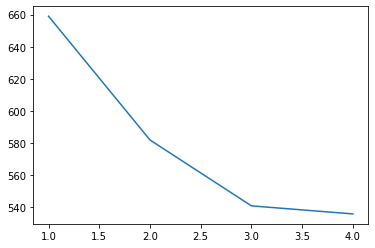

In [19]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Choosing K=3

In [20]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(clu)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 547.0
Run 1, iteration: 2/100, moves: 14, cost: 541.0
Run 1, iteration: 3/100, moves: 0, cost: 541.0


In [21]:
fitClusters_cao

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0], dtype=uint16)

**Combining the predicted clusters with the original DF**

In [22]:
df = data.reset_index()

In [23]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [24]:
combinedDf.head()

,Name,Q1,Q2,Q3,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_6,...,Q15_10,Q16_10,S1,S2,S3,S4,S5,S6,S7,cluster_predicted
0,Shonuben nileshbhai bariya,45,4,Job Housewife Independent Profession,0,1,0,0,1,0,...,NaN,3,43.333333,50.000000,48.888889,24.444444,36.666667,54.444444,24.444444,1
1,Tinaben bariya,65,1,Job,0,0,0,0,1,0,...,NaN,3,47.777778,53.333333,54.444444,35.555556,30.000000,65.555556,28.888889,1
2,Sonal bariya,35,5,Housewife small businessJob,0,0,0,0,1,1,...,NaN,3,65.555556,60.000000,65.555556,47.777778,47.777778,76.666667,34.444444,1
3,Gita,83,0,small businessJob,0,0,0,0,1,1,...,NaN,3,61.111111,72.222222,77.777778,42.222222,35.555556,72.222222,23.333333,1
4,Hemu,35,5,Housewife Job,0,0,0,0,1,0,...,NaN,3,60.000000,53.333333,65.555556,41.111111,34.444444,71.111111,34.444444,1


Using affinity propagation

In [25]:
from kmodes import kmodes
import multiprocessing
from sklearn import metrics
def TrainCluster(df, start_k=2, end_k=20):
    print('training cluster')
    K = []
    SSE = []
    silhouette_all = []
    models = [] #Save each model
    for i in range(start_k, end_k):
        kmodes_model = kmodes.KModes(n_clusters=i, n_jobs=multiprocessing.cpu_count())
        kmodes_model.fit(df)
        a = metrics.silhouette_score(df, kmodes_model.labels_, metric='hamming')
        SSE.append(kmodes_model.cost_)  # Save the SSE value of each k value
        K.append(i)
        print('{} Means SSE loss = {}'.format(i, kmodes_model.cost_))
        silhouette_all.append(a)
        print('This is the contour coefficient at k = {} times {}:'.format(i,a))
        models.append(kmodes_model) #Save the model corresponding to each k value

    return(K,SSE,silhouette_all,models)

training cluster
2 Means SSE loss = 531.0
This is the contour coefficient at k = 2 times 0.15692914879216108:
3 Means SSE loss = 488.0
This is the contour coefficient at k = 3 times 0.1634814386807061:
4 Means SSE loss = 480.0
This is the contour coefficient at k = 4 times 0.12017969682275653:
5 Means SSE loss = 467.0
This is the contour coefficient at k = 5 times 0.10543381630672831:
6 Means SSE loss = 448.0
This is the contour coefficient at k = 6 times 0.0914054642086788:


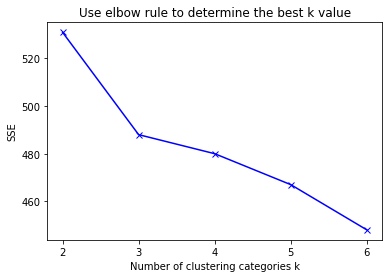

In [95]:
clu1=clu[["Q2","Q3_10","Q4","Q6","Q7","Q8","Q9","Q11","Q12_10","Q14_10","Q16_10"]]
train_cluster_res = TrainCluster(clu1,start_k=2, end_k=7)
K = train_cluster_res[0]
SSE = train_cluster_res[1]
plt.plot(K, SSE, 'bx-')
plt.xlabel('Number of clustering categories k')
plt.ylabel('SSE')
plt.xticks(K)
plt.title('Use elbow rule to determine the best k value')
plt.show()

**K=3**

In [27]:
clu.columns

Index(['Q2', 'Q3_10', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9', 'Q11', 'Q12_10', 'Q13_10',
       'Q14_10', 'Q16_10', 'Q20_bin'],
      dtype='object')

In [28]:
df1=pd.DataFrame(clu["Q2"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 44.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 83.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 62.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 44.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 26.0


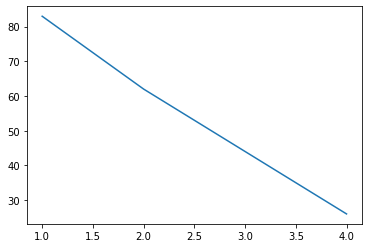

In [29]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [30]:
df2=pd.DataFrame(clu["Q3_10"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 60.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 38.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11.0


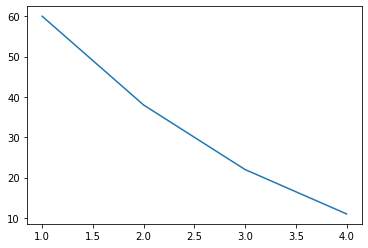

In [31]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df2)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [32]:
df3=pd.DataFrame(clu["Q4"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 52.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 37.0


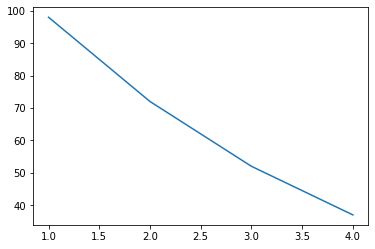

In [33]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df3)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [34]:
df4=pd.DataFrame(clu["Q6"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df4)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


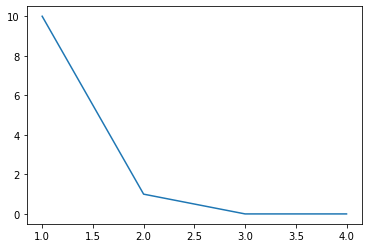

In [35]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df4)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [36]:
df5=pd.DataFrame(clu["Q7"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df5)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 78.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 36.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5.0


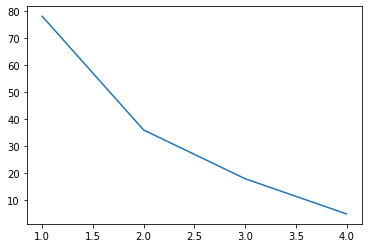

In [37]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df5)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [38]:
df6=pd.DataFrame(clu["Q8"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df6)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 50.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


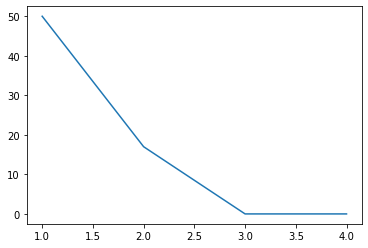

In [39]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df6)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [40]:
df7=pd.DataFrame(clu["Q9"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df7)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 43.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


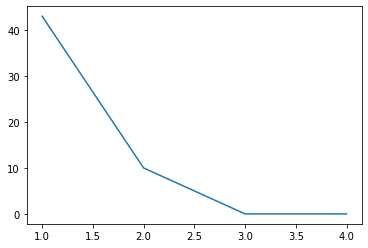

In [41]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 3, verbose=1)
    kmode.fit_predict(df7)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 74.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 31.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


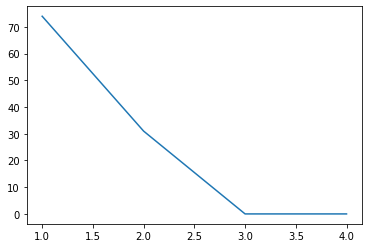

In [42]:
df8=pd.DataFrame(clu["Q11"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df8)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 53.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 29.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 19.0


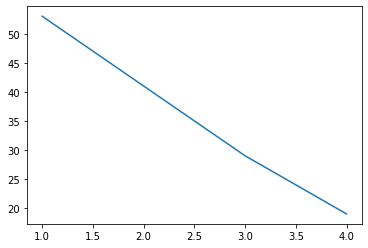

In [43]:
df9=pd.DataFrame(clu["Q12_10"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df9)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


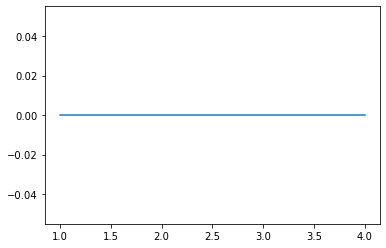

In [44]:
df10=pd.DataFrame(clu["Q13_10"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df10)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 38.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


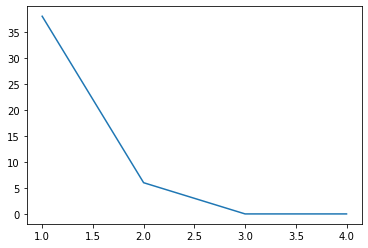

In [45]:
df11=pd.DataFrame(clu["Q14_10"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df11)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 21.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0


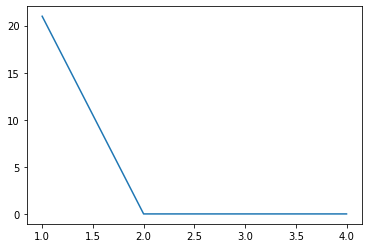

In [46]:
df12=pd.DataFrame(clu["Q16_10"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df12)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 51.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2.0


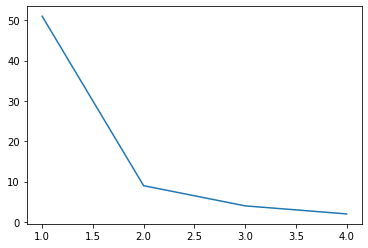

In [47]:
df13=pd.DataFrame(clu["Q20_bin"])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df13)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 158.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 130.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 103.0


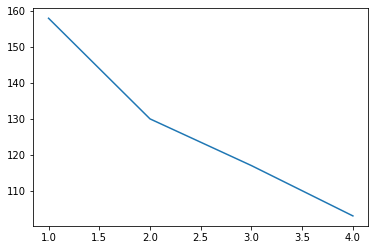

In [48]:
df14=pd.DataFrame(clu[["Q3_10","Q4"]])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df14)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 70.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 32.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 21.0


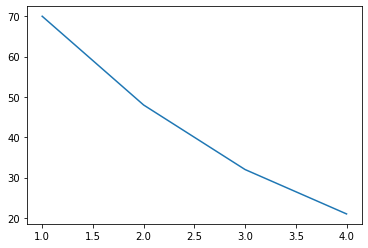

In [49]:
df14=pd.DataFrame(clu[["Q3_10","Q6"]])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df14)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 97.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 77.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 59.0


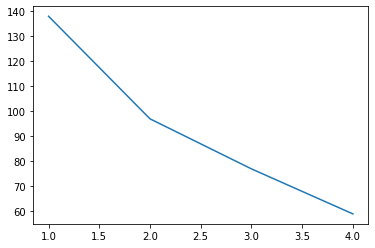

In [50]:
df15=pd.DataFrame(clu[["Q3_10","Q7"]])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df15)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 91.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 71.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 51.0


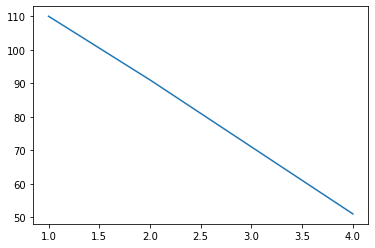

In [51]:
df16=pd.DataFrame(clu[["Q3_10","Q8"]])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 103.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 84.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 64.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 43.0


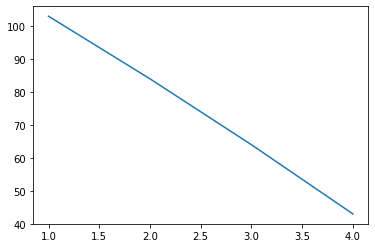

In [52]:
df16=pd.DataFrame(clu[["Q3_10","Q9"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 92.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 52.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 41.0


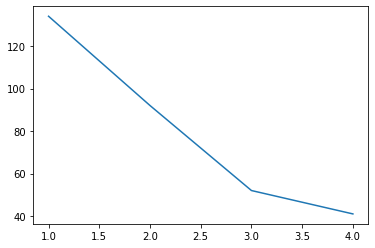

In [53]:
df16=pd.DataFrame(clu[["Q3_10","Q11"]])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/0, moves: 0, cost: 0.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 113.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 86.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 70.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 59.0


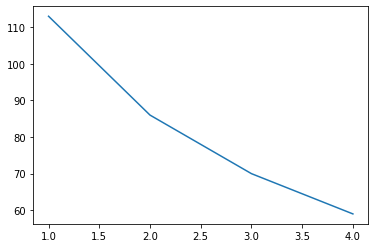

In [54]:
df16=pd.DataFrame(clu[["Q3_10","Q12_10"]])
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df8)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 60.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 38.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 22.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11.0


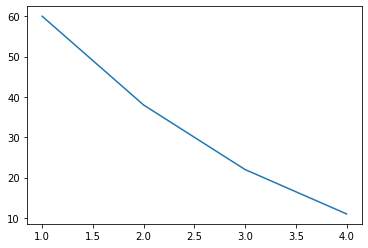

In [55]:
df16=pd.DataFrame(clu[["Q3_10","Q13_10"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 98.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 60.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 41.0


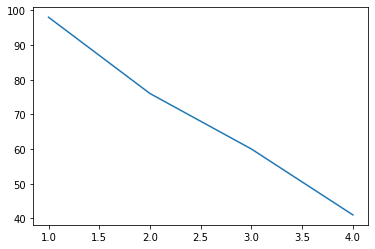

In [56]:
df16=pd.DataFrame(clu[["Q3_10","Q14_10"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 81.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 51.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 35.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10, cost: 24.0


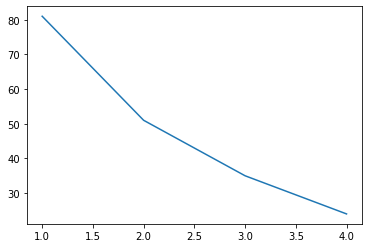

In [57]:
df16=pd.DataFrame(clu[["Q3_10","Q16_10"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 111.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 76.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 58.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 47.0


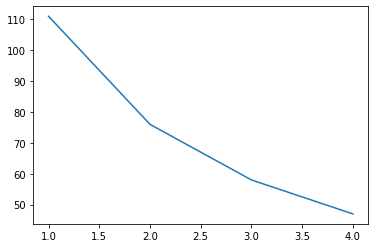

In [58]:
df16=pd.DataFrame(clu[["Q3_10","Q20_bin"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 268.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 245.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 233.0


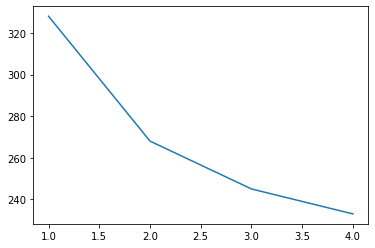

In [61]:
df16=pd.DataFrame(clu[["Q2","Q7","Q8","Q9","Q11"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 486.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 422.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 389.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 342.0


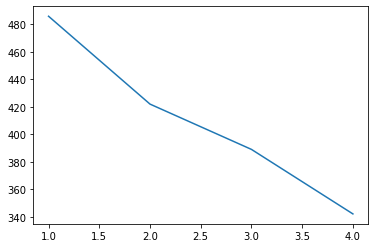

In [81]:
df16=pd.DataFrame(clu[["Q2","Q3_10","Q4","Q7","Q8","Q9","Q11"]])

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df16)
    cost.append(kmode.cost_)
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [123]:
clu1=clu[["Q2","Q3_10","Q4","Q7","Q8","Q9","Q11","Q12_10","Q14_10","Q16_10"]]
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(clu1)
# Predicted Clusters
label = fitClusters_cao
print(label)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 504.0
Run 1, iteration: 2/100, moves: 15, cost: 499.0
Run 1, iteration: 3/100, moves: 1, cost: 499.0
[1 1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 2 0 0 0 0 0 2 1 2 2 1 0 0 0 0 0 0 2 2 2 0
 2 2 2 2 1 1 1 1 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 0]


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.05176589344880446
For n_clusters = 3 The average silhouette_score is : 0.02793813836666844
For n_clusters = 4 The average silhouette_score is : 0.008375315105071607
For n_clusters = 5 The average silhouette_score is : 0.017850872293296148
For n_clusters = 6 The average silhouette_score is : 0.046505256520934755


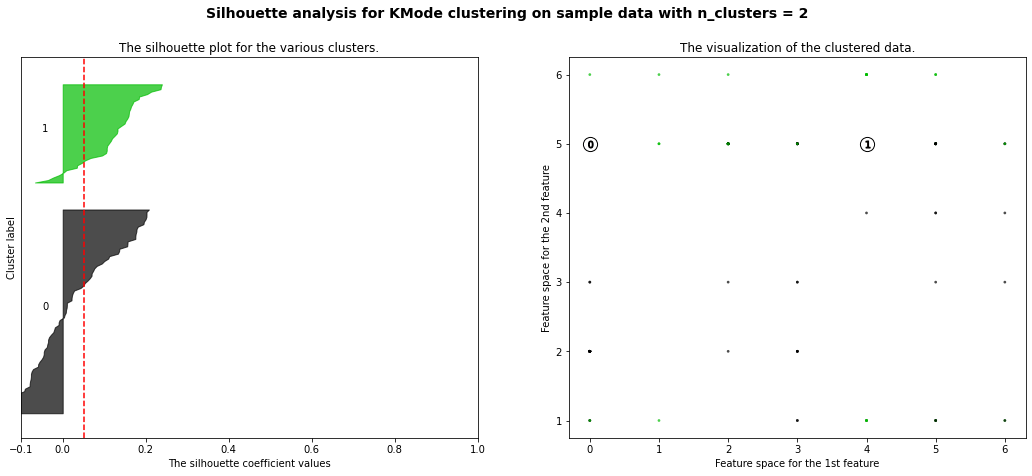

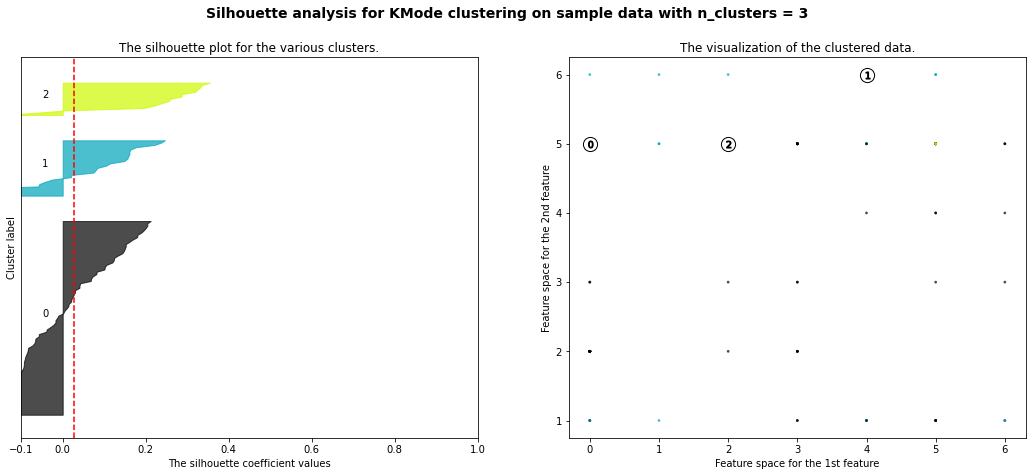

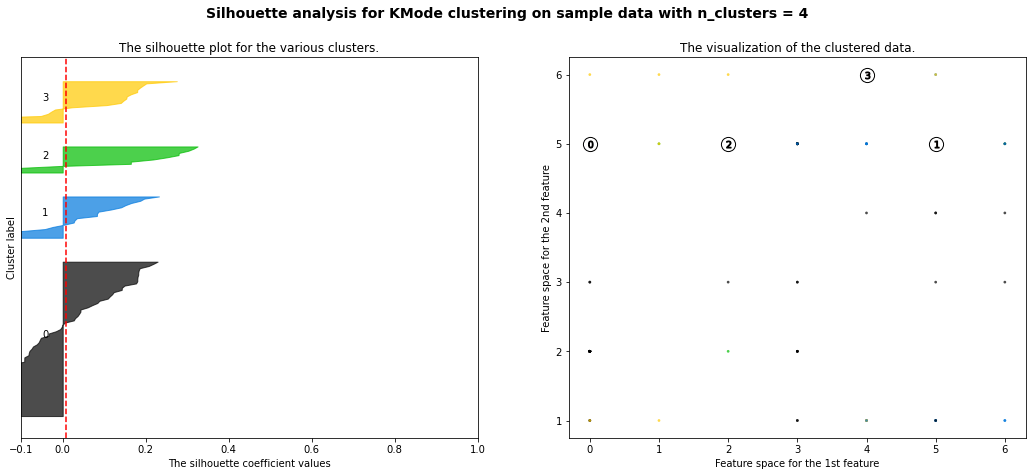

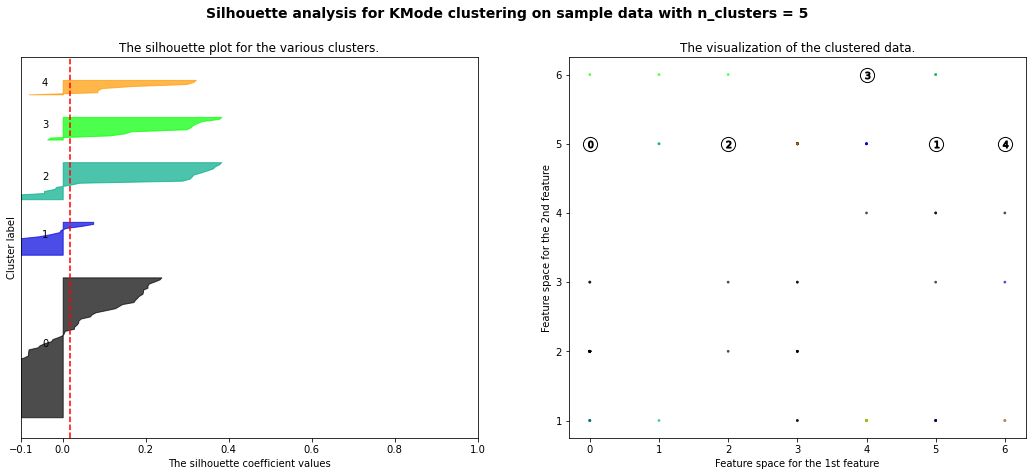

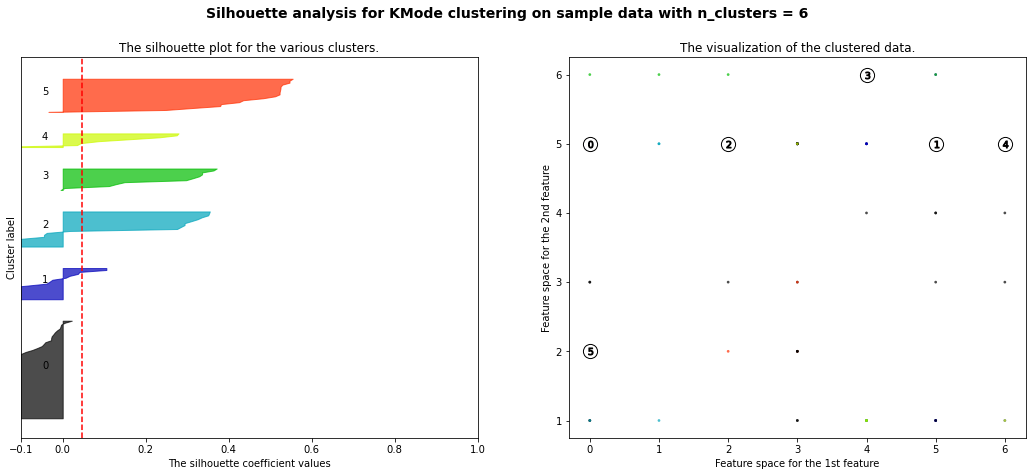

In [119]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
clu1=clu[["Q2","Q3_10","Q4","Q7","Q8","Q9","Q11","Q12_10","Q14_10","Q16_10",]]
# clu1=clu[["Q3_10","Q4","Q6","Q7","Q8","Q9","Q11","Q12_10","Q14_10","Q16_10","Q20_bin"]]
X=clu1

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KModes(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centroids_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMode clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()